<a href="https://colab.research.google.com/github/GochiStuff/walmart-sales-predictor/blob/main/walmart_sales_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting off , we will just download the dataset frmo KaggleHub .
the data is for walmart sales.

In [ ]:
import kagglehub
from pathlib import Path

# Download latest version
path = kagglehub.dataset_download("mikhail1681/walmart-sales")

# print("Path to dataset files:", path)
files = list(Path(path).rglob("*"))

for file in files:
    print(file)


/root/.cache/kagglehub/datasets/mikhail1681/walmart-sales/versions/2/Walmart_Sales.csv


Other needed libs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [ ]:
wm_df = pd.read_csv(path + "/Walmart_Sales.csv")

Now we have data . now we do some checking


In [ ]:
print(wm_df.head(10))
print(wm_df.shape)
print(wm_df.info())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   
5      1  12-03-2010    1439541.59             0        57.79       2.667   
6      1  19-03-2010    1472515.79             0        54.58       2.720   
7      1  26-03-2010    1404429.92             0        51.45       2.732   
8      1  02-04-2010    1594968.28             0        62.27       2.719   
9      1  09-04-2010    1545418.53             0        65.86       2.770   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4 

hmm , now that I have data , what should I do next ?? preprocess it ? first visualize . its fun


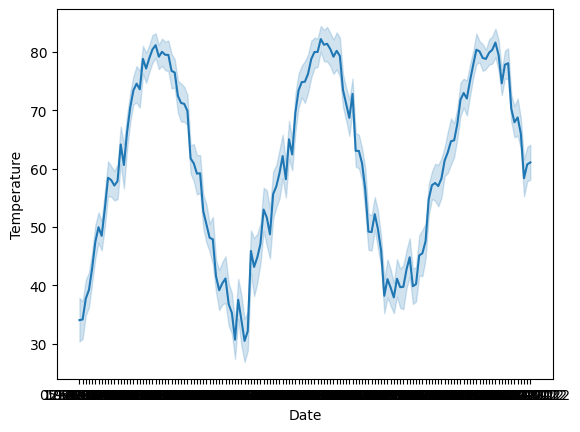

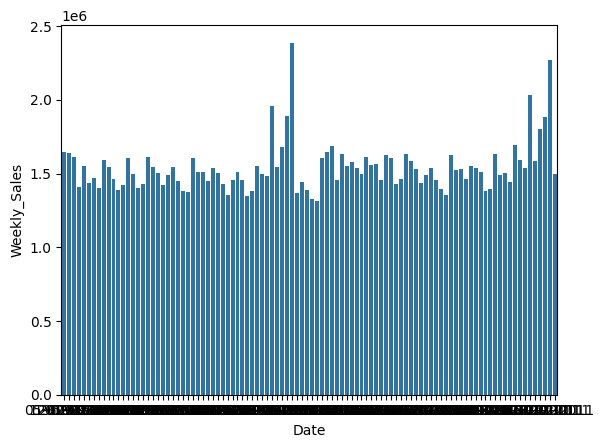

In [ ]:
# basic line plot first

df_limited = wm_df.head(100)
sns.lineplot(x=wm_df["Date"] , y=wm_df["Temperature"])
plt.show()
sns.barplot(x=df_limited["Date"] , y=df_limited["Weekly_Sales"])
plt.show()

data is super fine , so no preprocessing , also I don't know how to do it anyways .

means skipping two steps .
preprocess and normalize data

Time to build the Linear regression Model
We have to find weights for
1. Holiday flag
2. Temp
3. Fuel Price
4. CPI
5. Unemployment

result , predicted weekly sales .



STEPS :
1. Split data for training and testing sets
2. Building the model
3. testing the model
4. using L1 loss
5. Hyperparameters
6. Test
7. Predict

# MODEL 1

In [135]:
X = wm_df[["CPI", "Holiday_Flag", "Temperature", "Fuel_Price", "Unemployment"]].values
y = wm_df["Weekly_Sales"].values

# Shuffle
indices = np.arange(len(X))
np.random.shuffle(indices)
X, y = X[indices], y[indices]

# Split Data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Normalize X and y
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
y_mean, y_std = y_train.mean(), y_train.std()

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std
# Check the shape
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5148, 5)
y_train shape: (5148,)
X_test shape: (1287, 5)
y_test shape: (1287,)


In [155]:
class LinearRegression_v2:
    def __init__(self, lr=0.01, epochs=1500):
        self.w = None
        self.b = 0
        self.lr = lr
        self.epochs = epochs

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def loss(self, y_pred, y_true):
        return np.mean((y_true - y_pred) ** 2)

    def compute_gradients(self, X, y_true, y_pred):
        n = len(y_true)
        dw = -2 * np.dot(X.T, (y_true - y_pred)) / n
        db = -2 * np.sum(y_true - y_pred) / n
        return dw, db

    def runLR(self, X, y):
        self.w = np.zeros(X.shape[1])  # Multiple weights for multiple features
        for epoch in range(self.epochs):
            y_pred = self.predict(X)
            loss = self.loss(y_pred, y)
            dw, db = self.compute_gradients(X, y, y_pred)

            # Update weights & bias
            self.w -= self.lr * dw
            self.b -= self.lr * db

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
    def test_accuracy(model, X_test, y_test):
      y_pred = model.predict(X_test)

      # Convert back from normalized form
      y_pred = (y_pred * y_std) + y_mean
      y_test = (y_test * y_std) + y_mean

      # RMSE (Root Mean Squared Error)
      rmse = ((y_test - y_pred) ** 2).mean() ** 0.5

      # R² Score (How well predictions match real values)
      y_mean_test = np.mean(y_test)
      ss_total = np.sum((y_test - y_mean_test) ** 2)
      ss_residual = np.sum((y_test - y_pred) ** 2)
      r2_score = 1 - (ss_residual / ss_total)

      # Accuracy in Percentage
      accuracy = max(0, r2_score) * 100

      print("\n📊 **Test Accuracy Results** 📊")
      print(f"🔹 RMSE: {rmse:.4f}")
      print(f"🔹 R² Score: {r2_score:.4f}")
      print(f"✅ **Accuracy: {accuracy:.2f}%**")

In [156]:
model = LinearRegression_v2()
model.runLR(X_train, y_train)

Epoch 0, Loss: 1.000000
Epoch 100, Loss: 0.976347
Epoch 200, Loss: 0.975118
Epoch 300, Loss: 0.974989
Epoch 400, Loss: 0.974973
Epoch 500, Loss: 0.974971
Epoch 600, Loss: 0.974971
Epoch 700, Loss: 0.974971
Epoch 800, Loss: 0.974971
Epoch 900, Loss: 0.974971
Epoch 1000, Loss: 0.974971
Epoch 1100, Loss: 0.974971
Epoch 1200, Loss: 0.974971
Epoch 1300, Loss: 0.974971
Epoch 1400, Loss: 0.974971


TEST


In [157]:
test_accuracy(model, X_test, y_test)


📊 **Test Accuracy Results** 📊
🔹 RMSE: 563957.5331
🔹 R² Score: 0.0268
✅ **Accuracy: 2.68%**
